In [115]:
!pip install python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-py3-none-any.whl size=5888 sha256=922ad1360f218384e0f95f6bf1b9a20493b20097ac34a98ce5d85613614a22bb
  Stored in directory: /root/.cache/pip/wheels/b0/0e/94/28cd6afa3cd5998a63eef99fe31777acd7d758f59cf24839eb
Successfully built python-speech-features


In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, make_scorer, log_loss, mean_squared_error
from sklearn.model_selection import learning_curve, validation_curve, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier

import glob
import os
import math
import python_speech_features as mfcc
from scipy.io.wavfile import read

import logging
logger = logging.getLogger()
logger.setLevel(logging.ERROR)

import seaborn as sns


In [ ]:
def get_MFCC(audio, sr):
    features = mfcc.mfcc(audio, sr, 0.025, 0.01, 13, appendEnergy = True)
    return np.mean(features, axis=0)

In [ ]:
data_file_names = [os.path.basename(x) for x in glob.glob("/content/drive/My Drive/Recordings/*")]

In [ ]:
sr, audio = read('/content/drive/My Drive/Recordings/'+data_file_names[0])
features = get_MFCC(audio, sr)
datasetdata={}
for feature_idx in range(len(features)):
  datasetdata[feature_idx] = features[feature_idx]
main_dataset = pd.DataFrame(data=datasetdata, index=[0])
for sample in range(1,len(data_file_names)):
  sr, audio = read('/content/drive/My Drive/Recordings/'+data_file_names[sample])
  features = get_MFCC(audio, sr)
  datasetdata={}
  for feature_idx in range(len(features)):
    datasetdata[feature_idx] = features[feature_idx]
  df = pd.DataFrame(data=datasetdata, index=[0])
  main_dataset = main_dataset.append(df, ignore_index=True)


In [ ]:
result = [data_file_names[i][0]+data_file_names[i][1] for i in range(len(data_file_names))]

In [ ]:
label_encoding = preprocessing.LabelEncoder()
encoded_labels = label_encoding.fit_transform(result)
dataset_result = pd.DataFrame({"Result":encoded_labels})
label_with_name = label_encoding.classes_

In [ ]:
main_dataset_mean = main_dataset.mean(axis=0)
main_dataset_std = main_dataset.std(axis=0)
main_dataset_normalize = (main_dataset - main_dataset_mean)/main_dataset_std

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(main_dataset_normalize, dataset_result, test_size=0.2, random_state=42)

In [ ]:
# from google.colab import files

# X_train.to_csv('x_train.csv', index = False)
# files.download('x_train.csv')

# y_train.to_csv('y_train.csv', index = False)
# files.download('y_train.csv')

# X_test.to_csv('x_test.csv', index = False)
# files.download('x_test.csv')

# y_test.to_csv('y_test.csv', index = False)
# files.download('y_test.csv')

In [ ]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy().flatten()
y_test = y_test.to_numpy().flatten()

labels={}
labels['English'] = "English"
labels['Mixed'] = "Mixed"
labels['Urdu'] = "Urdu"

In [ ]:
# X_train_df = pd.read_csv('x_train.csv')
# X_test_df = pd.read_csv('x_test.csv')
# y_train_df = pd.read_csv('y_train.csv')
# y_test_df = pd.read_csv('y_test.csv')

# X_train = X_train_df.to_numpy()
# X_test = X_test_df.to_numpy()
# y_train = y_train_df.to_numpy().flatten()
# y_test = y_test_df.to_numpy().flatten()

# PART 1: Training & Testing All 3 Models

## Implementing kNN Classifier:

#### Initializing & Fitting the model


In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(knn,X_train,y_train,cv=5)
Sum = sum(scores)
print("accuracy=",Sum/5)

accuracy= 0.79536821028614


In [ ]:
knnOptimized = KNeighborsClassifier()
range_para = {'n_neighbors': np.arange(1, 20)}
knn_with_gs = GridSearchCV(knnOptimized, range_para, cv=5, return_train_score=True, scoring="neg_log_loss")
knn_with_gs.fit(X_train, y_train)
knn_with_gs.best_params_

{'n_neighbors': 19}

In [ ]:
knn_with_gs.cv_results_["mean_train_score"]
np.arange(1, 20)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

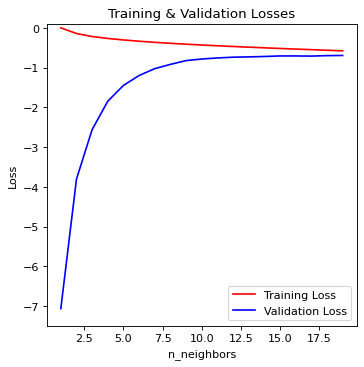

In [ ]:
param_range = np.arange(1, 20)
plt.figure(figsize=(5, 5), dpi=80)
plt.title("Training & Validation Losses")

plt.ylabel("Loss")
plt.xlabel(r"n_neighbors")

plt.ylim(-7.5, 0.1)
plt.plot(param_range, knn_with_gs.cv_results_["mean_train_score"], label="Training Loss", color="red")
plt.plot(param_range, knn_with_gs.cv_results_["mean_test_score"], label="Validation Loss", color="blue")

plt.legend(loc="best")
plt.show()


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

#training the KNN classifier with the training data using best 'k' from the cross validation 
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
pred_labels = knn.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, pred_labels)
print("Accuracy = ", accuracy)
print(classification_report(y_test, pred_labels))

Accuracy =  0.8055235903337169
              precision    recall  f1-score   support

           0       0.75      0.81      0.78      1067
           1       0.86      0.82      0.84      1393
           2       0.81      0.79      0.80      1016

    accuracy                           0.81      3476
   macro avg       0.80      0.80      0.80      3476
weighted avg       0.81      0.81      0.81      3476



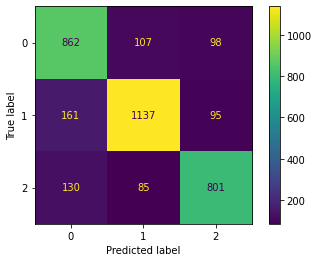

In [ ]:
conf_mat = confusion_matrix(y_test, pred_labels)
plot_cnm = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=labels)
plot_cnm.plot()
plt.grid(False)
plt.show()

## Implementing Decision Trees

In [ ]:
tree = DecisionTreeClassifier()

In [ ]:
tree.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [ ]:
range_para = {'max_depth': np.arange(5, 30)}
tree_with_gs = GridSearchCV(tree, range_para, cv=5, return_train_score=True, scoring="neg_log_loss")
tree_with_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(ccp_alpha=0, max_depth=5),
             param_grid={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29])},
             return_train_score=True, scoring='neg_log_loss')

In [ ]:
tree_with_gs.cv_results_["mean_test_score"]

array([ -1.10746114,  -1.18785052,  -1.33704365,  -1.55340285,
        -1.88259474,  -2.61241857,  -3.4830993 ,  -4.45313323,
        -5.86141436,  -7.1753682 ,  -8.42018795,  -9.83226315,
       -11.17013197, -12.24386396, -13.19951646, -13.74105124,
       -14.35268111, -14.69254197, -15.00223825, -15.08658795,
       -15.20590398, -15.36620871, -15.42816501, -15.34431691,
       -15.44887643])

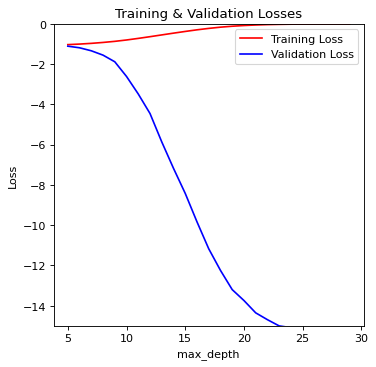

In [ ]:
param_range = np.arange(5, 30)
plt.figure(figsize=(5, 5), dpi=80)
plt.title("Training & Validation Losses")

plt.ylabel("Loss")
plt.xlabel(r"max_depth")

plt.ylim(-15, 0)
plt.plot(param_range, tree_with_gs.cv_results_["mean_train_score"], label="Training Loss", color="red")
plt.plot(param_range, tree_with_gs.cv_results_["mean_test_score"], label="Validation Loss", color="blue")

plt.legend(loc="best")
plt.show()


In [ ]:
tree = DecisionTreeClassifier(max_depth=21, ccp_alpha=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0, max_depth=21)

In [ ]:
pred_labels = tree.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, pred_labels)
print("Accuracy = ", accuracy)
print(classification_report(y_test, pred_labels))

Accuracy =  0.5929228998849252
              precision    recall  f1-score   support

           0       0.58      0.58      0.58      1067
           1       0.64      0.62      0.63      1393
           2       0.55      0.57      0.56      1016

    accuracy                           0.59      3476
   macro avg       0.59      0.59      0.59      3476
weighted avg       0.59      0.59      0.59      3476



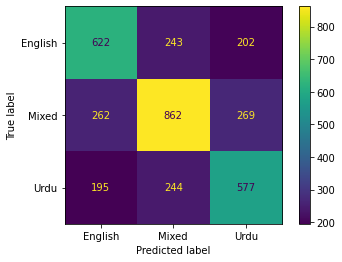

In [ ]:
conf_mat = confusion_matrix(y_test, pred_labels)
plot_cnm = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=labels)
plot_cnm.plot()
plt.grid(False)
plt.show()

# Implementing Random Forest: (FINAL SELECTED)

Reason: 

KNN only calculates the distance of the test instant with the nearest k points and in case of big data set it may take a lot of time because it calculates the distance from each training point. Also it may not work very well if there is some noise in the data.

On the other hand, Random forest is just a bundle of decision trees. The process of bagging is totally random so there is less possibility of inter dependency so this method can work very well in case the data is even noisy.

Possibly some decision trees would give us false output but there would be trees opposing the output of those trees and this effect would cancel each other. At the end there is a handsome probability of getting the right output by the remaining trees.

This is a reason why we are preffering random forest though we are getting slightly higher accuracy using KNN model.

In [94]:
RF = RandomForestClassifier()
range_para = {'n_estimators': np.arange(300, 350)}
rf_with_gs = GridSearchCV(RF, range_para, cv=5, return_train_score=True, scoring="neg_log_loss")
rf_with_gs.fit(X_train, y_train)
rf_with_gs.best_params_

{'n_estimators': 301}

In [95]:
# 5 Fold Loss Report

print("\nSplit 0 Loss in Training Data\n")
print(rf_with_gs.cv_results_["split0_train_score"])
print("\n")
print("\n Split 0 Loss in Validation Data\n")
print(rf_with_gs.cv_results_["split0_train_score"])

print("\nSplit 1 Loss in Training Data\n")
print(rf_with_gs.cv_results_["split1_train_score"])
print("\n")
print("\n Split 1 Loss in Validation Data\n")
print(rf_with_gs.cv_results_["split1_train_score"])

print("\nSplit 2 Loss in Training Data\n")
print(rf_with_gs.cv_results_["split2_train_score"])
print("\n")
print("\n Split 2 Loss in Validation Data\n")
print(rf_with_gs.cv_results_["split2_train_score"])

print("\nSplit 3 Loss in Training Data\n")
print(rf_with_gs.cv_results_["split3_train_score"])
print("\n")
print("\n Split 3 Loss in Validation Data\n")
print(rf_with_gs.cv_results_["split3_train_score"])

print("\nSplit 4 Loss in Training Data\n")
print(rf_with_gs.cv_results_["split4_train_score"])
print("\n")
print("\n Split 4 Loss in Validation Data\n")
print(rf_with_gs.cv_results_["split4_train_score"])

print("\nMean Loss in Training Data\n")
print(rf_with_gs.cv_results_["mean_train_score"])
print("\n")
print("\n Mean Loss in Validation Data\n")
print(rf_with_gs.cv_results_["mean_train_score"])


Split 0 Loss in Training Data

[-0.20144724 -0.20153434 -0.20172305 -0.20166886 -0.20106237 -0.20173593
 -0.20139006 -0.20110365 -0.20161823 -0.20216086 -0.20157485 -0.20141188
 -0.20133724 -0.20115042 -0.20100446 -0.20127445 -0.20133188 -0.2016746
 -0.20156163 -0.20166834 -0.20145742 -0.20145046 -0.20159848 -0.20134006
 -0.20116926 -0.20139616 -0.20102855 -0.20086063 -0.20137565 -0.20166765
 -0.20112802 -0.20127237 -0.20151381 -0.20123996 -0.20124498 -0.2015987
 -0.20168173 -0.20161228 -0.20062236 -0.20152579 -0.20116167 -0.20190259
 -0.20159343 -0.20154496 -0.20150962 -0.20179208 -0.20127514 -0.2011744
 -0.20121161 -0.20157133]



 Split 0 Loss in Validation Data

[-0.20144724 -0.20153434 -0.20172305 -0.20166886 -0.20106237 -0.20173593
 -0.20139006 -0.20110365 -0.20161823 -0.20216086 -0.20157485 -0.20141188
 -0.20133724 -0.20115042 -0.20100446 -0.20127445 -0.20133188 -0.2016746
 -0.20156163 -0.20166834 -0.20145742 -0.20145046 -0.20159848 -0.20134006
 -0.20116926 -0.20139616 -0.20102

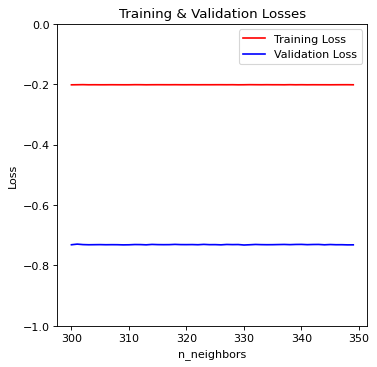

In [97]:
param_range = np.arange(300, 350)
plt.figure(figsize=(5, 5), dpi=80)
plt.title("Training & Validation Losses")

plt.ylabel("Loss")
plt.xlabel(r"n_neighbors")

plt.ylim(-1, 0)
plt.plot(param_range, rf_with_gs.cv_results_["mean_train_score"], label="Training Loss", color="red")
plt.plot(param_range, rf_with_gs.cv_results_["mean_test_score"], label="Validation Loss", color="blue")

plt.legend(loc="best")
plt.show()


In [98]:
pred_labels =  rf_with_gs.predict(X_test)

In [99]:
accuracy = accuracy_score(y_test, pred_labels)
print("Accuracy = ", accuracy)
print(classification_report(y_test, pred_labels))

Accuracy =  0.7802071346375143
              precision    recall  f1-score   support

           0       0.78      0.73      0.76      1067
           1       0.77      0.85      0.81      1393
           2       0.78      0.74      0.76      1016

    accuracy                           0.78      3476
   macro avg       0.78      0.77      0.78      3476
weighted avg       0.78      0.78      0.78      3476



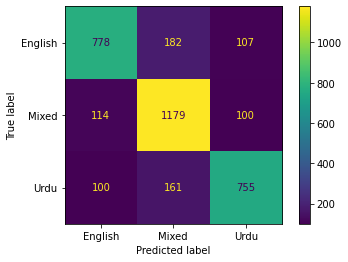

In [100]:
conf_mat = confusion_matrix(y_test, pred_labels)
plot_cnm = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=labels)
plot_cnm.plot()
plt.grid(False)
plt.show()

# PART 2: Kernelized SVM using sklearn Support Vector Classifier (SVC)

#### Initialize and Fitting the model with Kernel "rbf" - Radial basis function

In [ ]:
rbfSVM = svm.SVC(kernel='rbf', C = 1, probability=True)
rbfSVM.fit(X_train, y_train)


SVC(C=1, probability=True)

#### 5-Fold Cross-Validation, fitting the hyperparameter - Gamma 

In [ ]:
train_scores, validation_scores = validation_curve(rbfSVM, X_train, y_train, param_name="gamma", param_range=np.logspace(-1, 1, 5), cv=5, scoring="neg_log_loss")

In [ ]:
### Reporting The Losses ###

print("\nLoss in Training Data\n")
print(train_scores)
print("\n\n")
print("\nLoss in Validation Data\n")
print(validation_scores)


Loss in Training Data

[[-5.92280874e-01 -5.93747825e-01 -5.88019990e-01 -5.89144694e-01
  -5.91611833e-01]
 [-2.01749798e-01 -2.00707815e-01 -1.92277137e-01 -1.96538809e-01
  -1.99651048e-01]
 [-2.58246160e-02 -2.53498738e-02 -2.40345021e-02 -2.35112955e-02
  -2.42791435e-02]
 [-1.36206337e-03 -5.62787166e-04 -5.09372455e-04 -3.99039397e-04
  -3.25607047e-04]
 [-2.02095575e-07 -4.68745169e-07 -8.41039008e-08 -9.91190302e-07
  -6.91830854e-07]]




Loss in Validation Data

[[-0.71097588 -0.70503554 -0.70917097 -0.7430096  -0.70953747]
 [-0.4716403  -0.46523331 -0.49669087 -0.49057074 -0.47120098]
 [-0.47821848 -0.46858299 -0.49304511 -0.50452333 -0.49223732]
 [-0.76836968 -0.72442629 -0.74632222 -0.79790085 -0.74316718]
 [-1.0195884  -1.01545167 -1.00821961 -1.02518128 -1.0275988 ]]


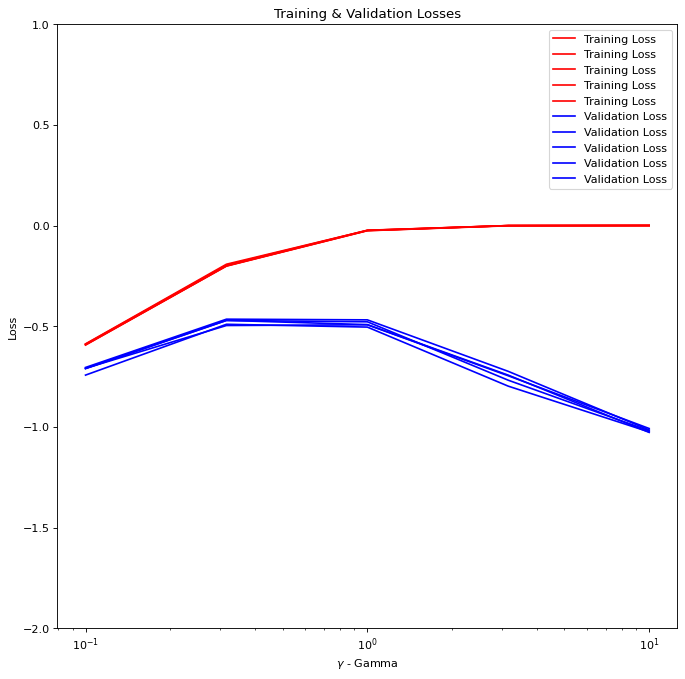

In [ ]:
param_range=np.logspace(-1, 1, 5)

plt.figure(figsize=(10, 10), dpi=80)
plt.title("Training & Validation Losses")

plt.ylabel("Loss")
plt.xlabel(r"$\gamma$ - Gamma")

plt.ylim(-2, 1)

plt.semilogx(param_range, train_scores, label="Training Loss", color="red")

plt.semilogx(param_range, validation_scores, label="Validation Loss", color="blue")

plt.legend(loc="best")
plt.show()


#### Fitting the model on optimized Coefficients. Taking Gamma = 0.5 & C = 0.5

In [ ]:
rbfSVM = svm.SVC(kernel='rbf', C = 0.5, gamma=0.5)
rbfSVM.fit(X_train, y_train)

SVC(C=0.5, gamma=0.5)

#### Prediction The Data

In [ ]:
pred_labels = rbfSVM.predict(X_test)

#### Calculating & Reporting Accuracy & Classification Report

In [ ]:
accuracy = accuracy_score(y_test, pred_labels)
print("Accuracy = ", accuracy)
print(classification_report(y_test, pred_labels))

Accuracy =  0.8147295742232451
              precision    recall  f1-score   support

           0       0.83      0.76      0.79      1067
           1       0.80      0.89      0.84      1393
           2       0.82      0.77      0.80      1016

    accuracy                           0.81      3476
   macro avg       0.82      0.81      0.81      3476
weighted avg       0.82      0.81      0.81      3476



#### Building & Plotting Confusion Matrix

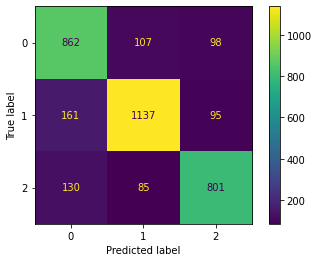

In [ ]:
conf_mat = confusion_matrix(y_test, pred_labels)
plot_cnm = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=labels)
plot_cnm.plot()
plt.grid(False)
plt.show()

# Part 3: Neural Network Implementation

In [110]:
# 5 fold validation
valdata = X_train # trdata has 1304 vectors so we are spliting it in f different parts with 260:260:260:260:264 paertitions
vall = y_train       # vall are labels of validation data
fld1 = valdata[:2779] # first fold 
ofld1 = vall[:2779]  # output of traning label for fld1 
fld2 = valdata[2780:5559]
ofld2 = vall[2780:5559]
fld3 = valdata[5560:8339]
ofld3 = vall[5560:8339]
fld4 = valdata[8340:11119]
ofld4 = vall[8340:11119]
fld5 = valdata[11124:13903]
ofld5 = vall[11124:13903]

def vald(f = 1): # f is for validation iteration from 1 to f, function vald wil return list with three members
                 # traning data for validation, labels of coresponding training set(cts) and test data for validation
        
        if f==1:
            trval = fld2+fld3+fld4+fld5 # traning data for validation
            tsval = fld1                # test data for validation 
            cts =  ofld2+ofld3+ofld4+ofld5
        elif f==2:
            trval = fld1+fld3+fld4+fld5 
            tsval = fld2
            cts = ofld1+ofld3+ofld4+ofld5 
        elif f==3:
            trval = fld1+fld2+fld4+fld5 
            tsval = fld3
            cts = ofld1+ofld2+ofld4+ofld5
        elif f==4:
            trval = fld1+fld2+fld3+fld5 
            tsval = fld4
            cts = ofld1+ofld2+ofld3+ofld5
        elif f==5:
            trval = fld1+fld2+fld3+fld4 
            tsval = fld5
            cts = ofld1+ofld2+ofld3+ofld4 
        result = [trval,cts,tsval]
        return result # trdata has 1304 vectors so we are spliting it in f different parts with 260:260:260:260:264 paertitions


In [111]:
def avf(f=1): #actual values for f = f from 1 to 5
    if f==1:
        tssnt = ofld1                
    elif f==2:
        tssnt = ofld2  
    elif f==3:
        tssnt = ofld3 
    elif f==4:
        tssnt = ofld4 
    elif f==5:
        tssnt = ofld5 
    return tssnt

In [118]:

ac = np.array([0.0]*5)
accr = 0
for f in range(1,6): # f from 1 to 5 for 5 fold validation
        vld_data = vald(f)
        nnc = MLPClassifier(hidden_layer_sizes=300,alpha=0.01, max_iter=1500).fit(vld_data[0], vld_data[1]) # nnc = neral network classifier
        acr =  nnc.score(vld_data[2], avf(f)) # acr = acuracy 
        
        ac[f-1] = acr




In [119]:
#Validation acuuracy is 
accr = 0
for ind in range(5):
  accr += ac[ind]
 
print('5 fold Validation acuuracy is : ')
print(acr) 

5 fold Validation acuuracy is : 
0.04929830874415257


In [120]:
count = 0
y1 = np.array([0.00]*10)
alph = np.array([0.0001,0.0002,0.0004,0.0006,0.0008,0.001,0.003,0.005,0.007,0.01])
for alphas in alph:
   vld_data = vald(3)
   nnc = MLPClassifier(hidden_layer_sizes=4,alpha=alphas, max_iter=1500).fit(vld_data[0], np.ravel(vld_data[1]))
   y1[count] = nnc.score(vld_data[2], np.ravel(avf(3)))
   count += 1



In [121]:
count = 0
y2 = np.array([0.00]*10)
alph = np.array([0.0001,0.0002,0.0004,0.0006,0.0008,0.001,0.003,0.005,0.007,0.01])
for alphas in alph:
   vld_data = vald(3)
   nnc = MLPClassifier(hidden_layer_sizes=10,alpha=alphas, max_iter=1500).fit(vld_data[0], np.ravel(vld_data[1]))
   y2[count] = nnc.score(vld_data[2], np.ravel(avf(3)))
   count += 1

In [122]:
count = 0
y3 = np.array([0.00]*10)
alph = np.array([0.0001,0.0002,0.0004,0.0006,0.0008,0.001,0.003,0.005,0.007,0.01])
for alphas in alph:
   vld_data = vald(3)
   nnc = MLPClassifier(hidden_layer_sizes=60,alpha=alphas, max_iter=1500).fit(vld_data[0], np.ravel(vld_data[1]))
   y3[count] = nnc.score(vld_data[2], np.ravel(avf(3)))
   count += 1


In [123]:
count = 0
y4 = np.array([0.00]*10)
alph = np.array([0.0001,0.0002,0.0004,0.0006,0.0008,0.001,0.003,0.005,0.007,0.01])
for alphas in alph:
   vld_data = vald(3)
   nnc = MLPClassifier(hidden_layer_sizes=100,alpha=alphas, max_iter=1500).fit(vld_data[0], np.ravel(vld_data[1]))
   y3[count] = nnc.score(vld_data[2], np.ravel(avf(3)))
   count += 1

In [124]:
count = 0
y5 = np.array([0.00]*10)
alph = np.array([0.0001,0.0002,0.0004,0.0006,0.0008,0.001,0.003,0.005,0.007,0.01])
for alphas in alph:
   vld_data = vald(3)
   nnc = MLPClassifier(hidden_layer_sizes=150,alpha=alphas, max_iter=1500).fit(vld_data[0], np.ravel(vld_data[1]))
   y5[count] = nnc.score(vld_data[2], np.ravel(avf(3)))
   count += 1

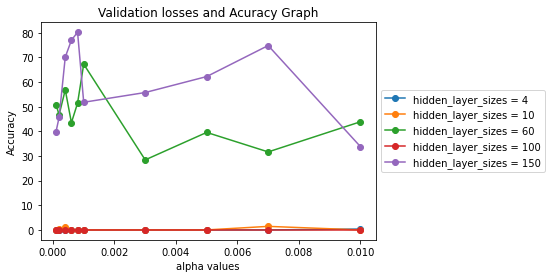

In [125]:
# Graph for 5 fold validation

plt.plot(alph, y1*1000.00,marker='o') # scaling and ploting
plt.plot(alph, y2*1000.00,marker='o')
plt.plot(alph, y3*1000.00,marker='o')
plt.plot(alph, y4*1000.00,marker='o')
plt.plot(alph, y5*1000.00,marker='o')

        
plt.xlabel('alpha values')
plt.ylabel("Accuracy")
plt.title("Validation losses and Acuracy Graph")
plt.legend(['hidden_layer_sizes = 4','hidden_layer_sizes = 10','hidden_layer_sizes = 60','hidden_layer_sizes = 100','hidden_layer_sizes = 150'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [126]:
# Testing
nnc = MLPClassifier(hidden_layer_sizes=300,alpha=0.09, max_iter=1500).fit(X_train, np.ravel(y_train))
acr =  nnc.score(X_test, np.ravel(y_test))
print("Accuracy is = ", acr)


Accuracy is =  0.706271576524741


In [127]:
y_pred = np.array([1]*len(X_test))
for i in range(len(X_test)):
  c=nnc.predict_proba(X_test[i].reshape(1, -1))
  y_pred[i] = np.argmax(c)

In [128]:
label_names = ['en', 'ue', 'ur']
print(classification_report(y_test, y_pred, target_names=label_names))

              precision    recall  f1-score   support

          en       0.70      0.64      0.67      1067
          ue       0.74      0.76      0.75      1393
          ur       0.67      0.70      0.69      1016

    accuracy                           0.71      3476
   macro avg       0.70      0.70      0.70      3476
weighted avg       0.71      0.71      0.71      3476



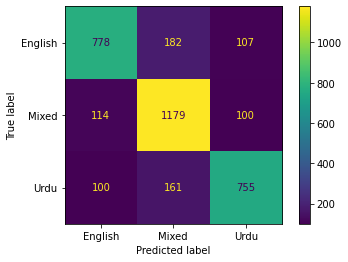

In [129]:

conf_mat = confusion_matrix(y_test, pred_labels)
plot_cnm = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=labels)
plot_cnm.plot()
plt.grid(False)
plt.show()

#Ensemble method 

### We will use methods from Decision Trees to implement Ensemble method classification with Forests of randomized trees

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [130]:
RF = RandomForestClassifier(n_estimators=300, max_depth=None,criterion='entropy',random_state=0)
RF.fit(X_train, np.ravel(y_train))
pred_Y = RF.predict(X_test)
rfacr = metrics.accuracy_score(y_test,pred_Y)
print(rfacr) 

0.784234752589183


In [132]:
emc = ExtraTreesClassifier(n_estimators=310, max_depth=None,min_samples_split=2, random_state=0) # Ensemble methods classifier
scoresv = cross_val_score(emc, X_train, np.ravel(y_train), cv=9) #score value
acur = scoresv.mean()
print("Accuracy score: ")
print(acur) # It is very high accuracy which is acheived with Ensemble methods

Accuracy score: 
0.7949354707088999
